<a href="https://colab.research.google.com/github/ShivakumarRavi/Bike_Sharing_MLR/blob/main/Bike_Sharing_Problem_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mulitple Linear Regression**
**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:


* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading and Understanding Data

In [2]:
data = pd.read_csv('day.csv')
#reading the data
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
data.shape

(730, 16)

In [4]:
data.info() #checking out for detailed info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Cleaning
**Drop columns that are nt useful for data analysis**

* instant: as it is the record index
* dteday: as the features of date are alreeady there like yr month and weekday
* casual and registered as the are in cnt, because cnt is sum of both the values

In [6]:
data.isnull().sum() #checking for missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# drop the variables instant, dteday, casual, registered since those varialbes has no significant.
data.drop(['instant', 'dteday', 'casual', 'registered'],axis=1,inplace=True)

In [8]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# **Outliers Treatment**

In [9]:
data.nunique() #gives info about unique values present in data.

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

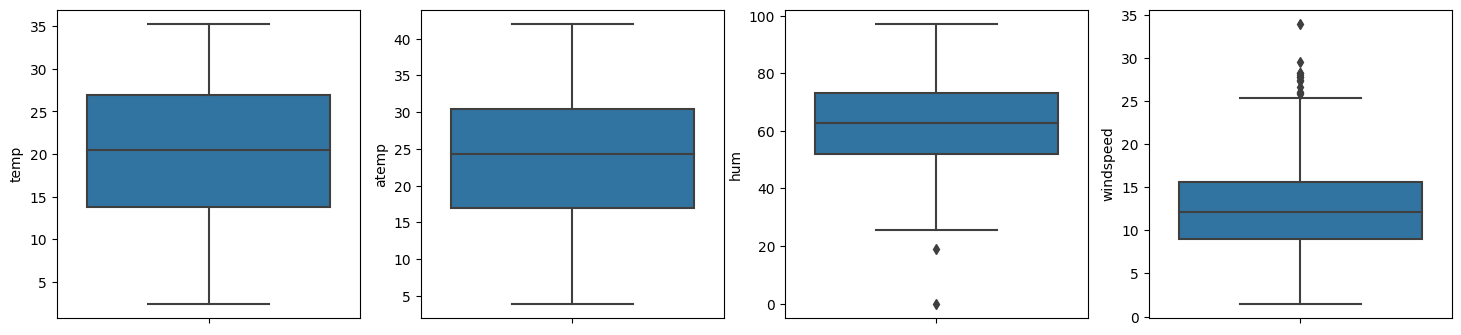

In [11]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=data)
    i+=1

So from the above plots it is clear that we don't have any outliers

# **EDA**

In [12]:
#changing categorical data which were primarily numeric to more meaningful one
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


# **Drawing pairplots to check for linear relationship**

<Figure size 1500x3000 with 0 Axes>

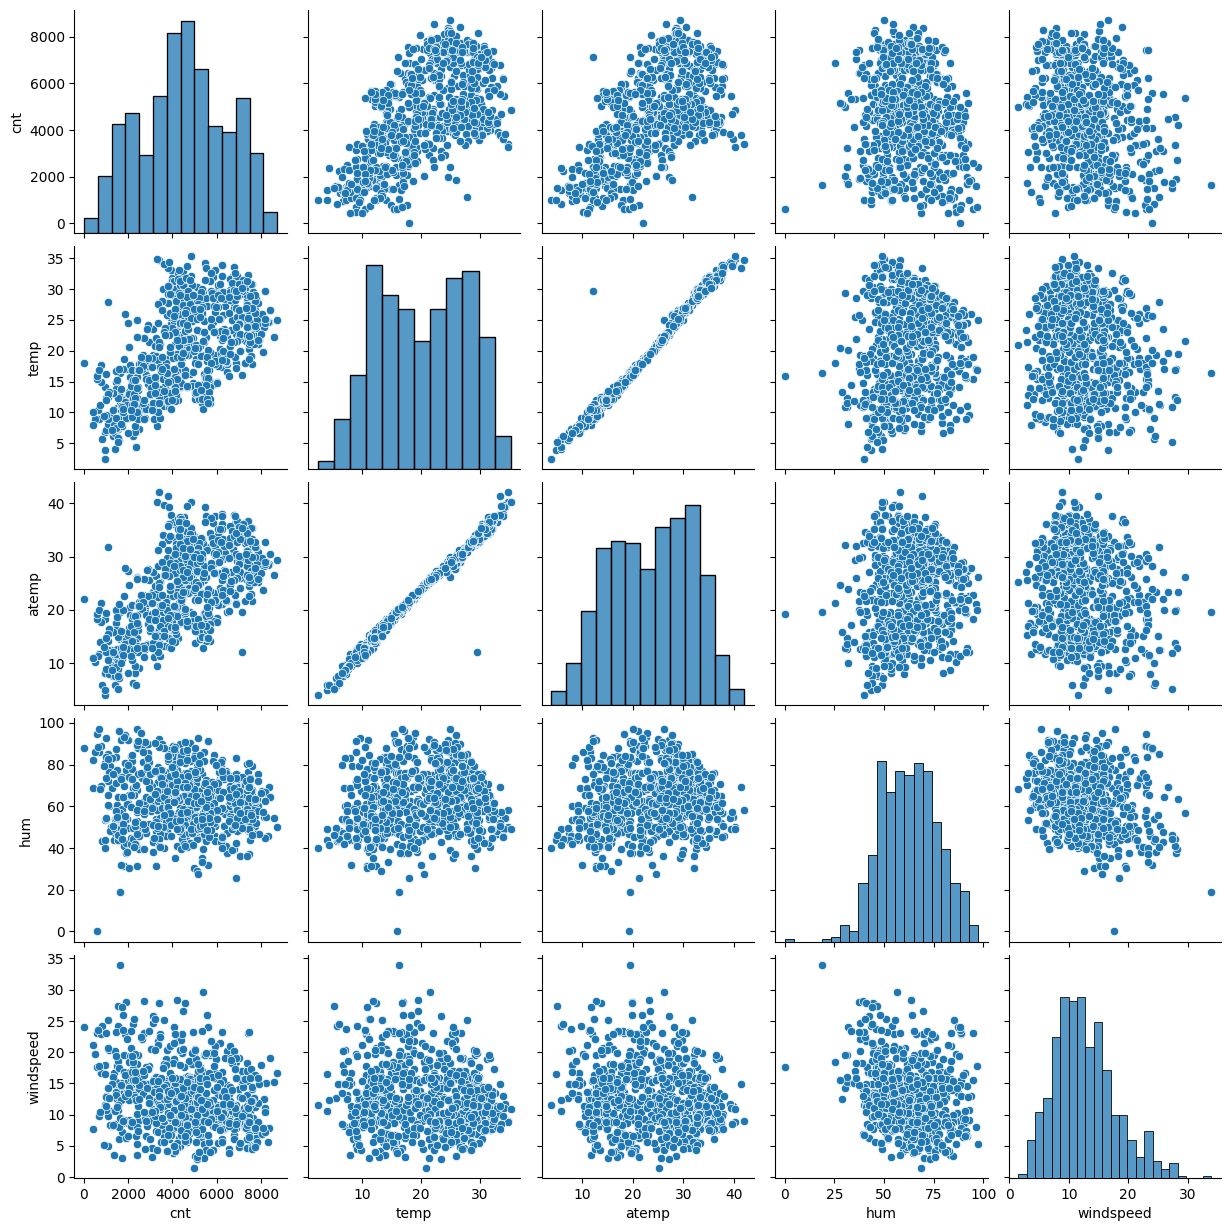

In [13]:
plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

* So from the above plots we can clearly understand that temp and atemp are having high correlation
* From the plots we can also say that there is alinear relationship between TEMP and ATEMP

# **Understand the data from Visualization**

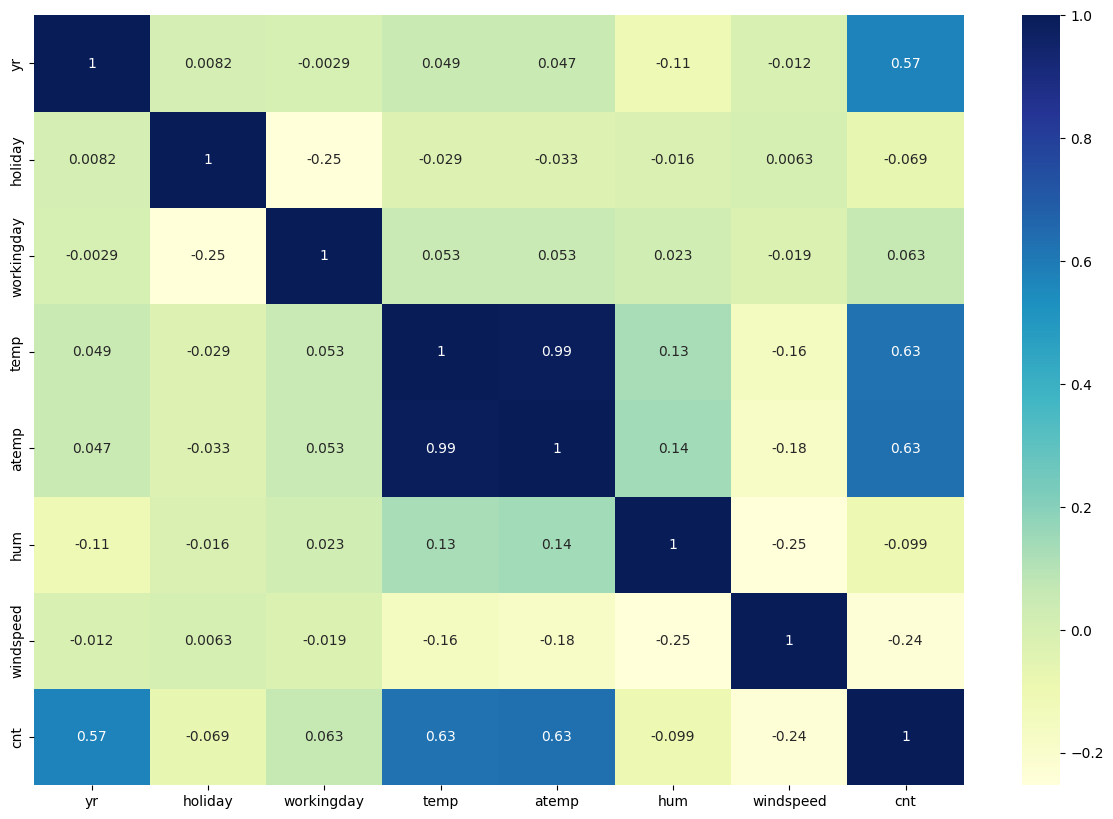

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

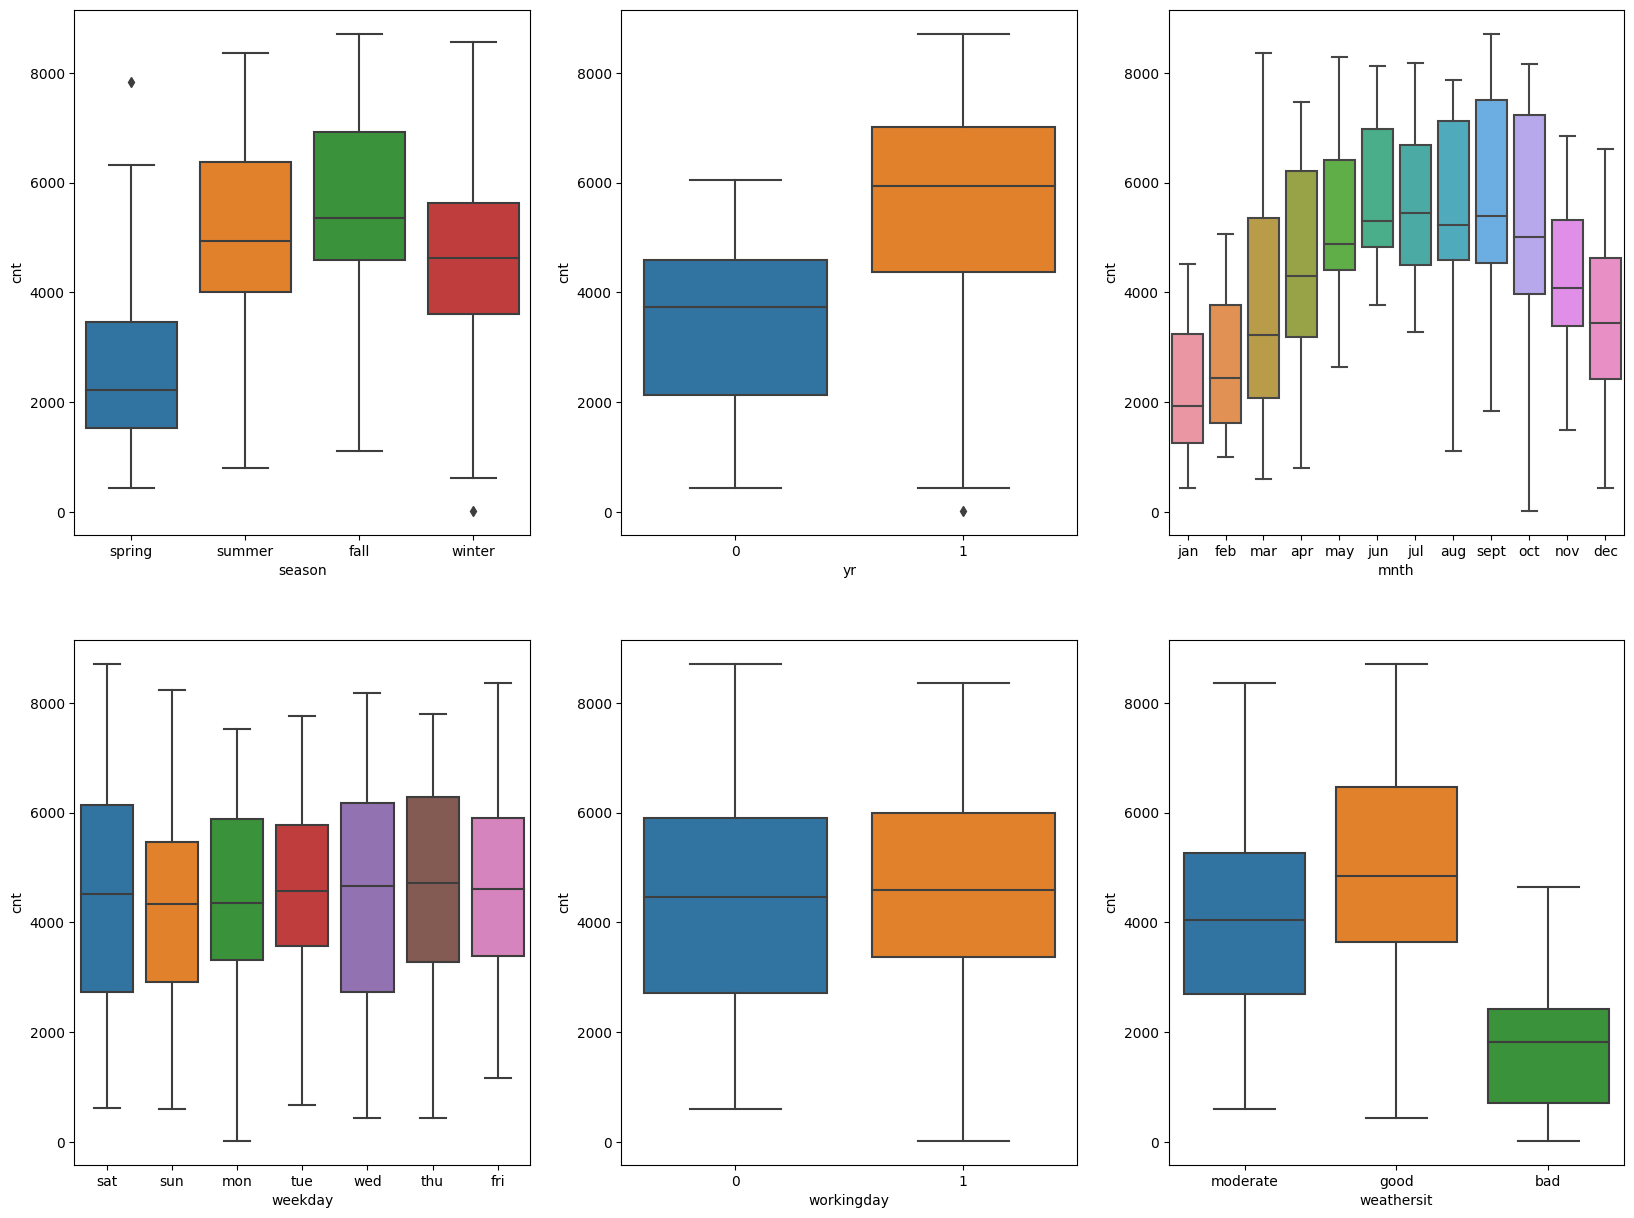

In [15]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=data)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=data)

# **Data preparation for linar regression**

In [16]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


Creating dummy variables for categorical variables

In [17]:
data = pd.get_dummies(data=data,columns=["season","mnth","weekday", "weathersit"],drop_first=True)

In [18]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [19]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


Split the data into training and testing data

In [20]:
#y to contain only target variable
y=data.pop('cnt')

#X is all remainign variable also our independent variables
X=data

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [21]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


In [22]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [23]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
400,1,0,0,0.261913,0.243430,0.637281,0.287411,1,0,0,...,0,0,0,0,1,0,0,0,0,1
450,1,0,1,0.334772,0.310549,0.130111,0.311480,0,1,0,...,0,0,0,0,0,0,1,0,1,0
142,0,0,1,0.725462,0.671054,0.792884,0.411769,0,1,0,...,0,0,1,0,0,0,0,0,0,1
368,1,0,1,0.061289,0.052856,0.288900,0.306123,1,0,0,...,0,0,0,0,0,0,0,1,0,1
231,0,0,0,0.808879,0.748105,0.619756,0.133638,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# **Build model using RFE**

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
# Cut down number of features to 15 using automated approach.
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [26]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 14),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 6),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 7),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 9),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [27]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [28]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [29]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [30]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [31]:
X_train_rfe.shape

(511, 15)

## **Model-1**

In [32]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     197.8
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          6.48e-198
Time:                        17:03:21   Log-Likelihood:                -4103.5
No. Observations:                 511   AIC:                             8239.
Df Residuals:                     495   BIC:                             8307.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1376.8500    

## **Model-2**

In [33]:
# droping the variable atemp, since it was negatively correlated and has high p-value and also the variable has high VIP (Multicollinearity).
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     207.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          4.80e-197
Time:                        17:03:23   Log-Likelihood:                -4108.3
No. Observations:                 511   AIC:                             8247.
Df Residuals:                     496   BIC:                             8310.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1371.5307    

## **Model-3**

In [34]:
# droping the variable windspeed, since it was negatively correlated.
cols = ['yr', 'holiday', 'temp', 'hum', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          8.17e-188
Time:                        17:03:25   Log-Likelihood:                -4133.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     497   BIC:                             8353.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -85.0303    

## **Model-4**

In [35]:
# droping the variable hum, since it was negatively correlated.
cols = ['yr', 'holiday', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.9
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.13e-187
Time:                        17:03:27   Log-Likelihood:                -4136.2
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     498   BIC:                             8353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -591.2344    

## **Model-5**

In [36]:
# droping the variable mnth_feb, since it was negatively correlated.
cols = ['yr', 'holiday', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weathersit_good', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     231.1
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          7.95e-188
Time:                        17:03:29   Log-Likelihood:                -4138.7
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     499   BIC:                             8352.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -650.7188    

## **Model-6**

In [37]:
# droping the variable weathersit_good, since it has high VIF value.
cols = ['yr', 'holiday', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_nov',
       'mnth_sept', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     174.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          4.51e-156
Time:                        17:03:30   Log-Likelihood:                -4216.5
No. Observations:                 511   AIC:                             8455.
Df Residuals:                     500   BIC:                             8502.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1731.2369    

## **Model-7**

In [38]:
# droping the variable mnth_jan, since it was negatively correlated and has high p-value.
cols = ['yr', 'holiday', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov',
       'mnth_sept', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     193.6
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          7.34e-157
Time:                        17:03:32   Log-Likelihood:                -4217.4
No. Observations:                 511   AIC:                             8455.
Df Residuals:                     501   BIC:                             8497.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1665.0437    

## **Model-8**

In [39]:
# droping the variable mnth_sept, since it has high p-value.
cols = ['yr', 'holiday', 'temp', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_nov', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     216.2
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          2.92e-157
Time:                        17:03:34   Log-Likelihood:                -4219.3
No. Observations:                 511   AIC:                             8457.
Df Residuals:                     502   BIC:                             8495.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1664.2754    

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 (below 5%) and R2 is 0.77 which is very good model. Hence we finalize this model to use further

In [42]:
cols = ['yr', 'holiday', 'temp', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weathersit_moderate']
lr = LinearRegression()
lr.fit(X_train[cols],y_train)

LinearRegression()

In [43]:
print(lr.intercept_,lr.coef_)

1664.2754319029373 [2171.44280856 -703.68260905 3798.21914931 -978.69662754  749.39893929
 -528.20644955 -577.65930277 -490.12762581]


# **Residual Analysis**

In [44]:
y_train_pred = lr.predict(X_train[cols])

Text(0.5, 0, 'Errors')

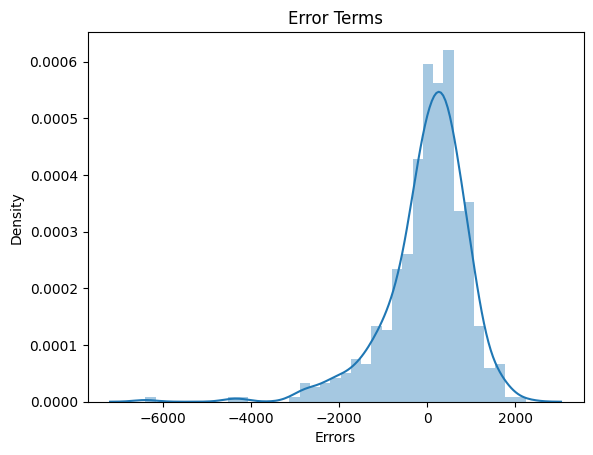

In [45]:
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

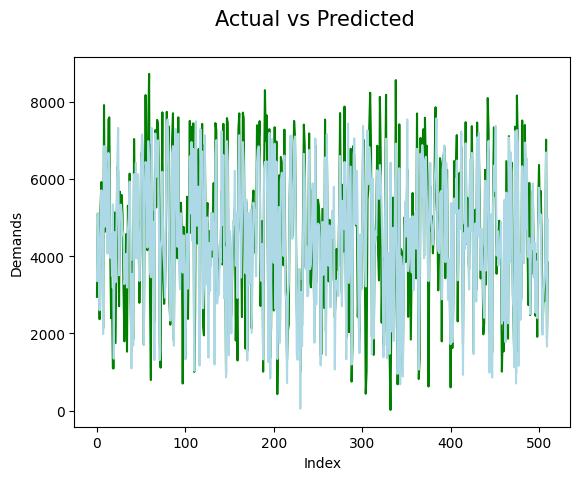

In [49]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="green")
plt.plot(c,y_train_pred, color="lightblue")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

# **Model Predictions**

In [50]:
# R-Squared value for train predictions
r2_score(y_train,y_train_pred)

0.7750686586065727

In [51]:
# Prediction of values on test dataset

In [52]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [54]:
cols = ['yr', 'holiday', 'temp', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weathersit_moderate']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

In [55]:
# R-Squared value for test predictions
r2_score(y_test,y_test_pred)

0.7616026232843696

# **Evaluating the model**

In [56]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.7616026232843696

Text(0, 0.5, 'y_pred')

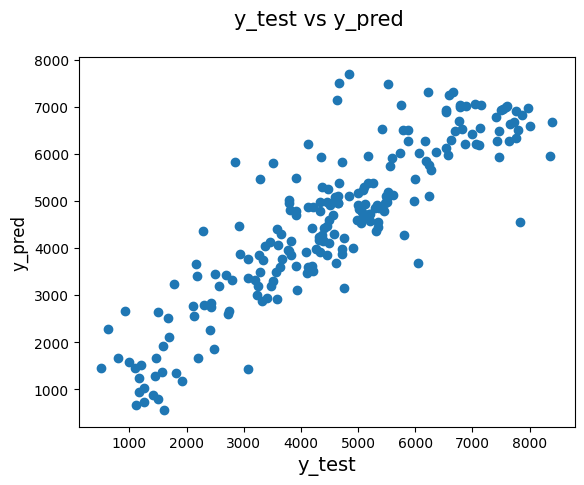

In [57]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 12)